In [4]:
# prompt: read data

import pandas as pd

# Assuming your data is in a CSV file named 'data.csv'
# Replace 'data.csv' with your actual file name if different
try:
  df = pd.read_csv('/content/Mall_Customers.csv')
  print(df.head()) # Display the first few rows of the dataframe
except FileNotFoundError:
  print("Error: 'data.csv' not found. Please upload the file or provide the correct path.")
except pd.errors.EmptyDataError:
  print("Error: 'data.csv' is empty.")
except pd.errors.ParserError:
  print("Error: Could not parse 'data.csv'. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


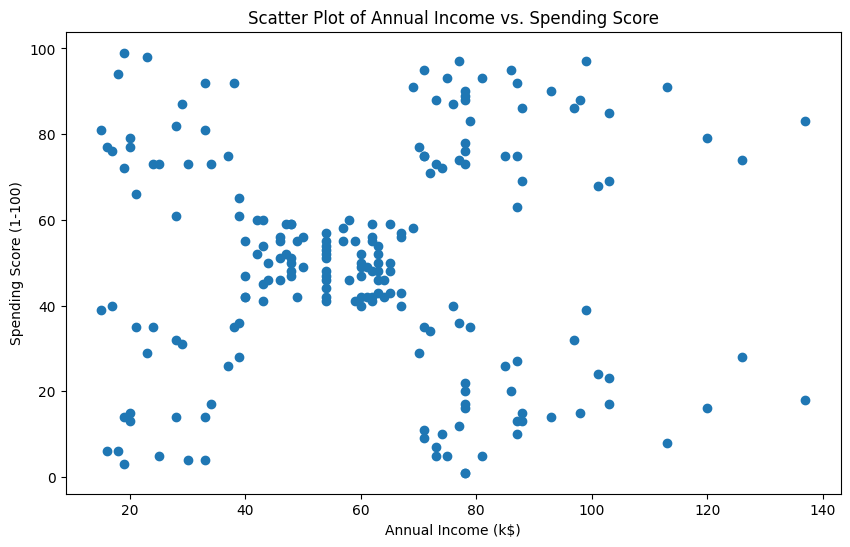

In [5]:
# prompt: perform scatter plot for any two features and check is their any data cluster( CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100))

import matplotlib.pyplot as plt

# Assuming df is already loaded from the previous code block
try:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Scatter Plot of Annual Income vs. Spending Score')
    plt.show()
except NameError:
    print("Error: 'df' is not defined. Please make sure the dataframe is loaded correctly in the previous code block.")
except KeyError as e:
  print(f"Error: Column '{e}' not found in the dataframe. Please check column names.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

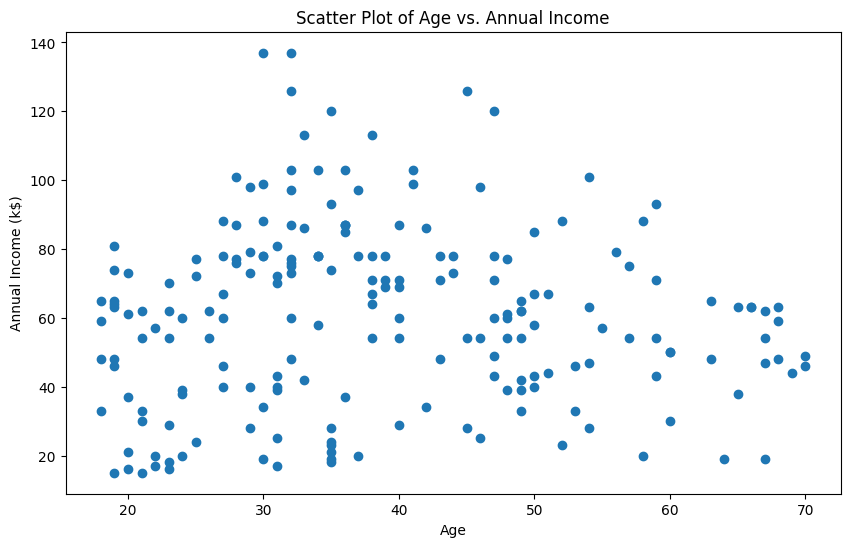

In [9]:
# prompt: perform scatter plot for any two features and check is their any data cluster( CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100))

import matplotlib.pyplot as plt

# Assuming df is already loaded from the previous code block
try:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Age'], df['Annual Income (k$)'])
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.title('Scatter Plot of Age vs. Annual Income')
    plt.show()
except NameError:
    print("Error: 'df' is not defined. Please make sure the dataframe is loaded correctly in the previous code block.")
except KeyError as e:
  print(f"Error: Column '{e}' not found in the dataframe. Please check column names.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

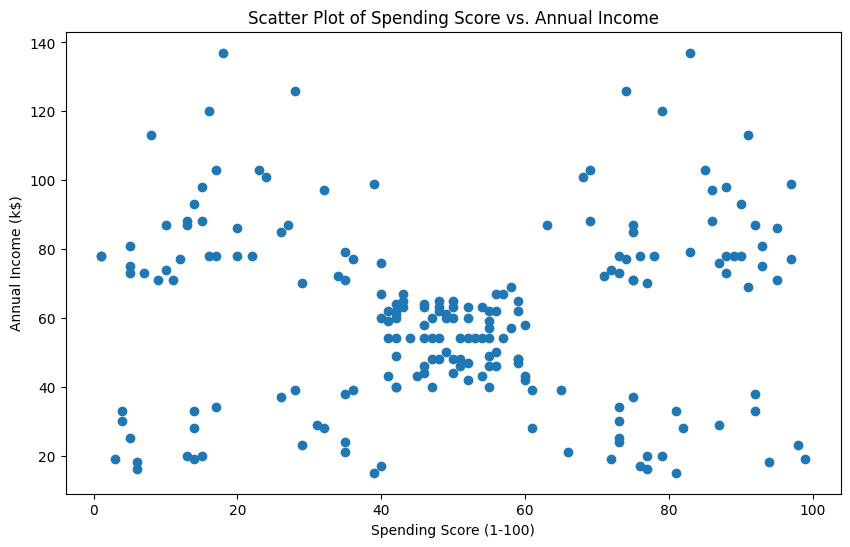

In [10]:
# prompt: perform scatter plot for any two features and check is their any data cluster( CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100))

import matplotlib.pyplot as plt

# Assuming df is already loaded from the previous code block
try:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
    plt.xlabel('Spending Score (1-100)')
    plt.ylabel('Annual Income (k$)')
    plt.title('Scatter Plot of Spending Score vs. Annual Income')
    plt.show()
except NameError:
    print("Error: 'df' is not defined. Please make sure the dataframe is loaded correctly in the previous code block.")
except KeyError as e:
  print(f"Error: Column '{e}' not found in the dataframe. Please check column names.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

In [15]:
relevant_cols = ["Age","Annual Income (k$)","Spending Score (1-100)"] # Changed "Spending score (1-100)" to "Spending Score (1-100)" to match the actual column name in the DataFrame.
customer_df = df[relevant_cols]
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(customer_df)

StandardScaler()

In [19]:
scaled_data = scaler.transform(customer_df)

In [20]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [21]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

#measure of how tightly grouped the data points are within their clusters using elbow method. The inertia decreases as the number of clusters increases, but at some point, adding more clusters gives diminishing returns

In [24]:
!pip install scikit-learn # install necessary library if not present
from sklearn.cluster import KMeans # Import the KMeans class

def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k) # Now KMeans is defined and ready to be used
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

#measure of how tightly grouped the data points are within their clusters using elbow method. The inertia decreases as the number of clusters increases, but at some point, adding more clusters gives diminishing returns

In [25]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

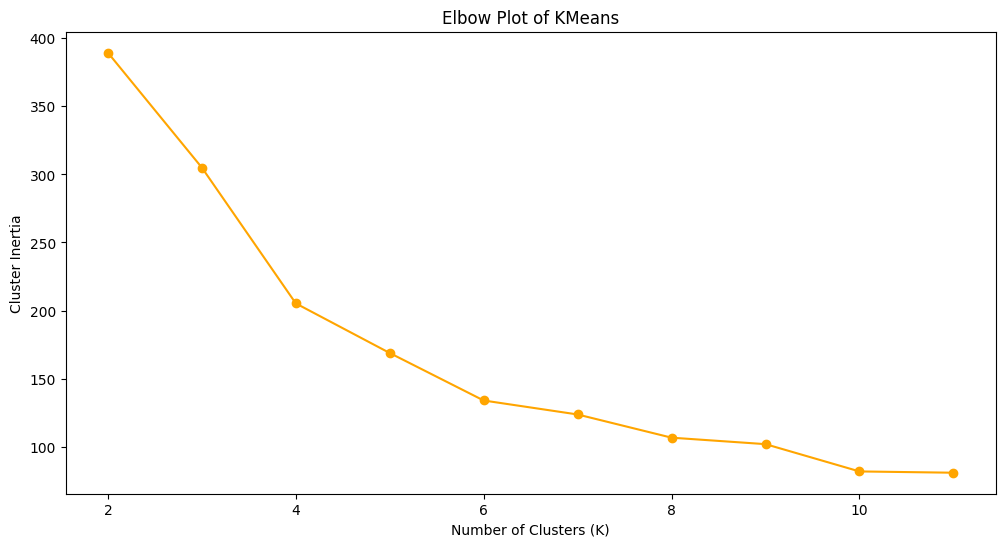

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ... (your existing functions: find_best_clusters, generate_elbow_plot) ...

# Call find_best_clusters to get the values:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)  # Assuming you want to check up to 12 clusters

# Now you can generate the elbow plot:
generate_elbow_plot(clusters_centers, k_values)

In [28]:
kmeans_model = KMeans(n_clusters = 5)

In [29]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [30]:
df["clusters"] = kmeans_model.labels_

In [31]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


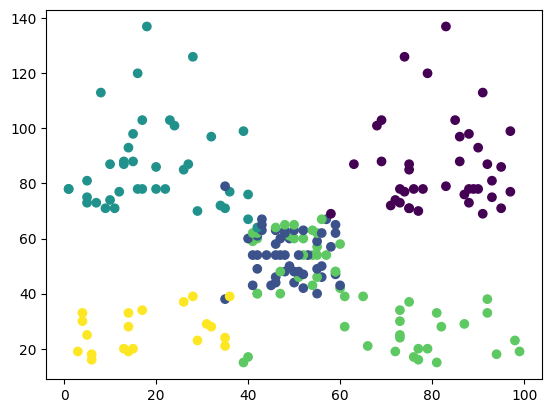

In [32]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c = df["clusters"]
            )